Copyright &copy; CAMMA, ICube, University of Strasbourg. All Rights Reserved.

<div>
<a href="https://cholectriplet2021.grand-challenge.org/">
<img src="https://raw.githubusercontent.com/DpkApt/evis_at/master/pictures/header.png" align="left"/>
</a>
</div>

## <h1><center>Getting Started</center></h1>


# Introduction

In this notebook, we provide sample code to help familiarize yourself with the challenge, the dataset and the metrics. These are minimal examples to help illustrate a simple deep learning pipeline applied on a small subset of the Action Triplet dataset, **CholecT50**.

# Data Loading and Visualization

In [1]:
# Import necessary libraries for this module

from PIL import Image

import csv
import matplotlib.pyplot as plt
import numpy as np
import os


print("Libraries successfully imported!")

Libraries successfully imported!


Here, we use a small subset of the CholecT50 dataset available at this link: https://seafile.unistra.fr/f/ba1427a82ecc4ce18566/?dl=1. If you are running this notebook on Colab, you can run the cell below to download and unzip the dataset to the current directory

In [2]:
# Ignore this cell if you have already downloaded and extracted the dataset

!wget -O CholecT50_sample.zip https://seafile.unistra.fr/f/ba1427a82ecc4ce18566/?dl=1
!unzip CholecT50_sample.zip


--2021-03-11 16:10:50--  https://seafile.unistra.fr/f/ba1427a82ecc4ce18566/?dl=1
Resolving seafile.unistra.fr (seafile.unistra.fr)... 130.79.254.37
Connecting to seafile.unistra.fr (seafile.unistra.fr)|130.79.254.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://seafile.unistra.fr/seafhttp/files/278bf8c1-84f1-4606-aacf-e6cc99606278/CholecT50_sample.zip [following]
--2021-03-11 16:10:51--  https://seafile.unistra.fr/seafhttp/files/278bf8c1-84f1-4606-aacf-e6cc99606278/CholecT50_sample.zip
Reusing existing connection to seafile.unistra.fr:443.
HTTP request sent, awaiting response... 200 OK
Length: 7711911 (7.4M) [application/zip]
Saving to: ‘CholecT50_sample.zip’

CholecT50_sample.zi 100%[===================>]   7.35M   147KB/s    in 53s     

2021-03-11 16:11:45 (143 KB/s) - ‘CholecT50_sample.zip’ saved [7711911/7711911]

Archive:  CholecT50_sample.zip
   creating: CholecT50_sample/
   creating: CholecT50_sample/data/
   creating: CholecT50_sample/

In [3]:
# Change the dataset_path mentioned below appropriately if you have exracted the data to a different directory 

dataset_path = './CholecT50_sample/'

data_path = os.path.join(dataset_path, 'data')
triplet_path = os.path.join(dataset_path, 'triplet')
dict_path = os.path.join(dataset_path, 'dict')
video_names = os.listdir(data_path)                                   

print("Dataset successfully extracted!")

Dataset successfully extracted!


In [4]:
# Create dictionary mapping triplet ids to readable label

with open(os.path.join(dict_path, 'triplet.txt'), 'r') as f:
  triplet_info = f.readlines()
  triplet_dict = {}
  for l in triplet_info:
    triplet_id, triplet_label = l.split(':')
    triplet_dict[int(triplet_id)] = triplet_label.rstrip()

print('Random triplet id and its human readable label\n')
random_triplet_id = np.random.choice(list(triplet_dict.keys()))
print('Triplet id: ', random_triplet_id, '\nReadable label: ', triplet_dict[random_triplet_id])

Random triplet id and its human readable label

Triplet id:  82 
Readable label:  irrigator,aspirate,fluid


In [5]:
def generator(data_path, triplet_path, video_names, batch_size, shuffle_videos=False):
  if shuffle_videos:
    video_names = np.random.shuffle(video_names)

  image_batch, triplet_batch, video_name_batch, frame_id_batch = [], [], [], []

  for video_name in video_names:
    with open(os.path.join(triplet_path, video_name + '.txt'), mode='r') as infile:
        reader = csv.reader(infile)

        for line in reader:
          line = np.array(line, np.uint8)
          frame_id, triplet_label = line[0], line[1:]
          image_path = os.path.join(data_path, video_name, "%06d.png" %frame_id)
          image = np.array(Image.open(image_path), np.float32) / 255.0

          image_batch.append(image)
          triplet_batch.append(triplet_label)
          video_name_batch.append(video_name)
          frame_id_batch.append(int(frame_id))

          if len(frame_id_batch) == batch_size:
            yield image_batch, triplet_batch, video_name_batch, frame_id_batch
            image_batch, triplet_batch, video_name_batch, frame_id_batch = [], [], [], []
            


Visualizing image...

Video name:  VID231  Frame_id 6


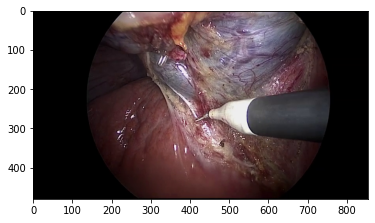


Encoding showing which of the 100 considered action triplets are represented in the image

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Readable labels

hook,dissect,gallbladder

Visualizing image...

Video name:  VID231  Frame_id 7


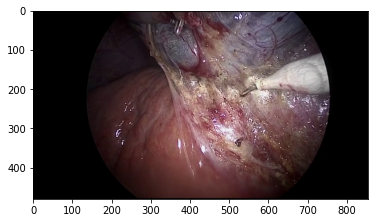


Encoding showing which of the 100 considered action triplets are represented in the image

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Readable labels

hook,dissect,gallbladder

Visualizing image...

Video name:  VID231  Frame_id 8


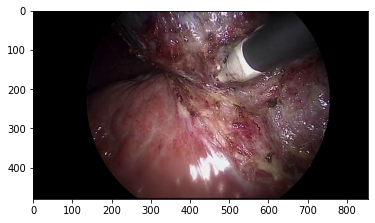


Encoding showing which of the 100 considered action triplets are represented in the image

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Readable labels

hook,dissect,gallbladder

Visualizing image...

Video name:  VID231  Frame_id 9


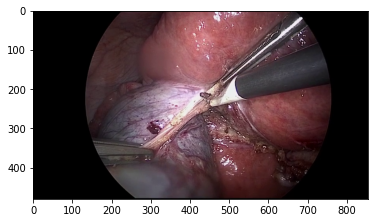


Encoding showing which of the 100 considered action triplets are represented in the image

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Readable labels

grasper,retract,cystic_plate
grasper,retract,gallbladder
hook,dissect,gallbladder

Visualizing image...

Video name:  VID231  Frame_id 10


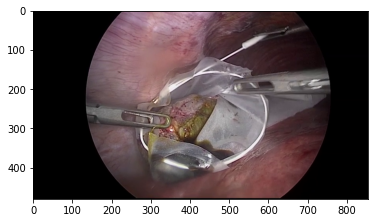


Encoding showing which of the 100 considered action triplets are represented in the image

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]

Readable labels

grasper,grasp,specimen_bag
grasper,null_verb,null_target

Visualizing image...

Video name:  VID231  Frame_id 11


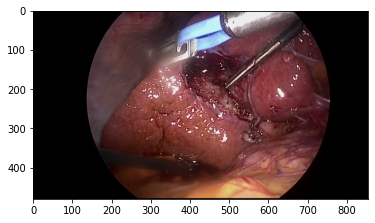


Encoding showing which of the 100 considered action triplets are represented in the image

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]

Readable labels

grasper,retract,liver
bipolar,coagulate,liver
grasper,null_verb,null_target

Visualizing image...

Video name:  VID231  Frame_id 12


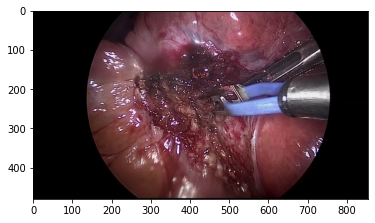


Encoding showing which of the 100 considered action triplets are represented in the image

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Readable labels

grasper,retract,liver
bipolar,coagulate,liver

Visualizing image...

Video name:  VID231  Frame_id 13


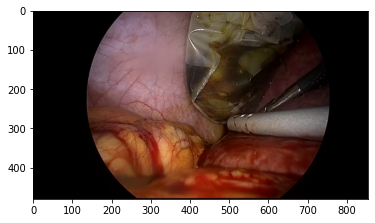


Encoding showing which of the 100 considered action triplets are represented in the image

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]

Readable labels

grasper,retract,gut
grasper,retract,liver
irrigator,irrigate,abdominal_wall_cavity


In [9]:
batch_size = 8
gen = generator(data_path, triplet_path, video_names, batch_size)

for images, triplet_labels, video_names, frame_ids in gen:
  for batch in range(batch_size):
    print('\nVisualizing image...\n')
    print('Video name: ', video_names[batch], ' Frame_id', frame_ids[batch])
    plt.imshow(images[batch])
    plt.show()
    print('\nEncoding showing which of the 100 considered action triplets are represented in the image\n')
    print(triplet_labels[batch])
    print('\nReadable labels\n')
    for triplet in np.where(triplet_labels[batch])[0]:
      print(triplet_dict[triplet])
    
  break

#  Building and Running Models 

We build and perform a simple forward pass of an image through a few layer convolutional network to predict the probability of each of the considered triplets being represented in the input image.

Note: Please run the cells in the previous module Data Loading and Visualization before running this module

In [10]:
# Import necessary libraries for this module

import tensorflow as tf

print("Libraries successfully imported!")

Libraries successfully imported!


Defining a simple neural network using tf.keras

In [11]:
# Defining the neural network architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(
    filters=16, kernel_size=3, strides=2, activation="relu", input_shape=(480, 854, 3))
)                 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides = 2, activation="relu")) 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides = 2, activation="relu")) 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides = 2, activation="relu")) 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides = 2, activation="relu")) 
model.add(tf.keras.layers.Flatten())                                     
model.add(tf.keras.layers.Dense(units=4096, activation="relu"))                 
model.add(tf.keras.layers.Dense(units=2048, activation="relu"))            
model.add(tf.keras.layers.Dense(units=100, activation="sigmoid"))    

print("Neural network architecture successfully defined!")

Neural network architecture successfully defined!


In [12]:
model.build([1, 480, 854, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 239, 426, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 212, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 105, 32)       9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 52, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 25, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 11200)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              4

Performing a simple forward pass

Performing a simple forward pass on our untrained network for a test image


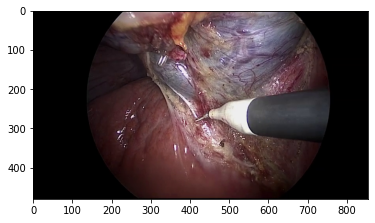


Prediction

[0.49861044 0.51178116 0.49807855 0.4944738  0.5032927  0.48525977
 0.4918394  0.4991463  0.49842444 0.48589286 0.50634205 0.5129622
 0.49175462 0.49342495 0.49089217 0.50352377 0.5037997  0.50548315
 0.5067924  0.5002563  0.49270093 0.50332355 0.50493026 0.51520574
 0.4987981  0.4966441  0.50411993 0.5058958  0.49134538 0.50303066
 0.5096115  0.50454617 0.49926156 0.4960603  0.49137983 0.5081571
 0.48207042 0.48663673 0.4878768  0.51070553 0.50516325 0.5002993
 0.5145138  0.49326494 0.50113845 0.49183598 0.5035184  0.48392448
 0.49733776 0.50563675 0.5044621  0.49368164 0.49573562 0.50739324
 0.493082   0.49408427 0.48375562 0.49466252 0.5074614  0.49400246
 0.4904899  0.4872705  0.48121867 0.512551   0.48811126 0.498858
 0.49367863 0.5028854  0.49099585 0.49499837 0.51719093 0.50599474
 0.5009308  0.48238596 0.50057495 0.49923238 0.5022537  0.49636027
 0.5092119  0.48564714 0.49071467 0.49612254 0.5016759  0.5063617
 0.49737573 0.4919666  0.4961639  0.50424427 0.5139452 

In [13]:
input_4d = np.expand_dims(images[0], axis=0)
print('Performing a simple forward pass on our untrained network for a test image')
plt.imshow(images[0])
plt.show()
print('\nPrediction\n')
print(model.predict(input_4d)[0])
print('\nLabel\n')
print(triplet_label)

#  Metrics and Evaluation 


In [14]:
# Import necessary libraries for this module

import numpy as np
from sklearn.metrics import average_precision_score


In [15]:
def _compute_AP(gt_labels, pd_probs, valid=None):
    """ Compute the average precision (AP) and mean AP of the model on the triplet predictions.
        Args:
            gt_labels: 1D (batch of) vector[N] of integer values 0's or 1's for the groundtruth labels.
            pd_probs:  1D (batch of) vector[N] of float values [0,1] for the predicted labels.
        Returns:
            results:   1D vector[N] of AP for each class 
    """
    gt_instances  = np.sum(gt_labels, axis=0)
    pd_instances  = np.sum(pd_probs, axis=0)
    computed_ap   = average_precision_score(gt_labels, pd_probs, average=None)
    actual_ap     = []
    # actual_ap_sum = 0
    # class_count   = 0
    num_classes   = np.shape(gt_labels)[-1]
    for k in range(num_classes):
        # same = computed_ap[k]
        if ((gt_instances[k] != 0) or (pd_instances[k] != 0)) and not np.isnan(computed_ap[k]):
            actual_ap.append(computed_ap[k])
            # actual_ap_sum += computed_ap[k]
            # class_count   += 1
        else:
            actual_ap.append("n/a")
    return actual_ap

    # mean_ap = actual_ap_sum / class_count
    # actual_ap.append(mean_ap)
    # actual_ap = [np.round(x*100,2) if str(x)!='n/a' else x for x in actual_ap]
    # if valid!=None:
    #     actual_ap[-1] = np.round(np.mean( [actual_ap[i] for i in valid if str(actual_ap[i])!='n/a'] ), 2)
    # return actual_ap
    


In [20]:
a = 1
print(a==a)

b = float(np.nan)
print(b==b)

print(np.isnan(b))

True
False
True


In [21]:
def _average_by_videos(results):
    n = results.shape[-1]
    AP = []
    for j in range(n):
        x = results[:,j]
        x = np.mean([float(a) for a in x if (str(a)!='n/a') ])
        if np.isnan(x):
            AP.append("n/a")
        else:          
            AP.append(x)
    mAP = np.mean( [i for i in AP if i !='n/a'])
    return np.array(AP), mAP


In [24]:
# example usage

half_0s = np.zeros(shape=[20,100], dtype=np.int64)
half_1s = np.ones(shape=[20,100], dtype=np.int64)

vid230_gt = np.concatenate((half_0s, half_1s), axis=0)
vid231_gt = np.concatenate((half_1s, half_0s), axis=0)

vid230_pd = np.random.random((40,100))
vid231_pd = np.random.random((40,100))

non_null  = list(range(0,93)) # for ignoring the null triplets
ap_vid230 = _compute_AP(gt_labels=vid230_gt, pd_probs=vid230_pd, valid=non_null)
ap_vid231 = _compute_AP(gt_labels=vid231_gt, pd_probs=vid231_pd, valid=non_null)

ap_vid  = np.stack([ap_vid230, ap_vid231,], axis=0)
AP,mAP  = _average_by_videos(results=ap_vid)

print(AP, "\nmAP = ",mAP)

[53.815 46.535 55.25  52.745 45.845 52.75  55.31  58.785 60.76  54.37
 47.81  63.95  55.335 61.02  61.195 55.205 50.985 57.04  46.435 50.05
 50.66  63.78  52.81  49.96  58.87  67.265 69.405 53.395 46.72  51.555
 58.37  53.23  65.67  56.53  51.765 63.215 47.47  56.055 64.87  63.725
 47.    44.91  48.55  63.405 51.595 49.08  52.895 54.005 48.555 48.145
 50.995 58.59  57.41  52.735 44.17  51.905 63.1   50.16  49.09  51.85
 57.78  52.36  51.985 51.16  50.34  48.465 55.33  65.105 60.315 55.805
 47.92  65.05  57.47  62.515 44.4   55.905 46.365 47.735 64.975 47.87
 56.705 55.35  57.27  49.2   51.22  56.885 54.455 53.305 51.    49.32
 50.67  42.725 54.56  57.605 70.285 42.13  51.05  58.58  49.455 59.25
 54.195] 
mAP =  54.284356435643566


#  Saving Results


In [ ]:
# Import necessary libraries for this module

from PIL import Image

import csv
import os

In [ ]:
# Ignore this cell if you have already downloaded and extracted the dataset or run the Data Loading and Visualization section.

!wget -O CholecT50_sample.zip https://seafile.unistra.fr/f/ba1427a82ecc4ce18566/?dl=1
!unzip CholecT50_sample.zip


For the final challenge evaluation, each participant will need to create a .txt output file for each test video and save as {Video-name}_{team-name}_results.txt. This txt file should contain the predicted probabilities for each action triplet. Here, we provide a standalone example to execute this workflow

In [27]:
# Defining a simple generator to return images sequentially 

def eval_generator(data_path):
  images_and_frame_ids = [(x, int(x.split('.')[0])) for x in os.listdir(data_path)]
  # Sorting inputs by frame id
  images_and_frame_ids = sorted(images_and_frame_ids, key=lambda x: x[1])
  for image_name, frame_id in images_and_frame_ids:
    image_path = os.path.join(data_path, image_name)
    image = np.array(Image.open(image_path), np.float32) / 255.0
    yield np.expand_dims(image, 0), frame_id
            

In [25]:
# Defining a model that takes an input 4d input of size (Batch x Height x Width x Channels)
# and returns a prediction. Here, we use a random model.

def my_model(input):
  batch, _, _, _ = input.shape
  return np.random.uniform(0, 1, (batch, 100))

Read images sequentially from a specified input folder.

In [28]:
input_dir = './CholecT50_sample/data/VID230'
output_dir = './'
video_name = os.path.basename(input_dir)
output_filename = video_name + '_' + 'MyTeamName_results.txt'
output_path = os.path.join(output_dir, output_filename)

video_results = []
for image, frame_id in eval_generator(input_dir):
  result = [frame_id]
  predictions = my_model(image)
  result.extend(list(predictions[0]))
  video_results.append(result)

with open(output_path, "w") as f:
    writer = csv.writer(f)
    writer.writerows(video_results)

In [ ]:
print(video_results[0])